In [34]:
from shapely import LineString, Point, MultiLineString, GeometryCollection

import math
import numpy as np

## Draw arrows

How to draw arrows?

* A head coordinate and a vector and a length?
* A head coordinate and a tail coordinate?

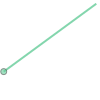

In [35]:
head = (10, 3)
tail_vec = np.array([30, 22])
tail_vec = tail_vec / np.linalg.norm(tail_vec)
mag = 40

tail_coord = np.array(head) + tail_vec * mag
tail_coord

arrow_shaft = LineString([head, tail_coord])

GeometryCollection([arrow_shaft, Point(head)])

## Add an arrow head

What angle does the arrow sharps follow? 30 degrees?

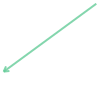

In [36]:
alpha = 30
a_rad = math.radians(alpha)

sharps_mag = max(2, mag * 0.05)
rot_mat_left = np.array([[math.cos(a_rad), math.sin(a_rad)], [-math.sin(a_rad), math.cos(a_rad)]])
rot_mat_right = np.array([[math.cos(-a_rad), math.sin(-a_rad)], [-math.sin(-a_rad), math.cos(-a_rad)]])
a_sharp_vec = tail_vec @ rot_mat_left
b_sharp_vec = tail_vec @ rot_mat_right

a_sharp_coord = np.array(head) + a_sharp_vec * sharps_mag
b_sharp_coord = np.array(head) + b_sharp_vec * sharps_mag

a_sharp = LineString([head, a_sharp_coord])
b_sharp = LineString([head, b_sharp_coord])

arrow = GeometryCollection([arrow_shaft, a_sharp, b_sharp])
arrow

## Try a simpler way of creating arrow sharps

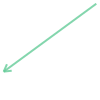

In [37]:
import shapely.affinity as aff
alpha = 30
scale = 0.07
a_sharp = aff.rotate(arrow_shaft, alpha, origin=Point(head))
a_sharp = aff.scale(a_sharp, xfact=scale, yfact=scale, origin=Point(head))
b_sharp = aff.rotate(arrow_shaft, -alpha, origin=Point(head))
b_sharp = aff.scale(b_sharp, xfact=scale, yfact=scale, origin=Point(head))
GeometryCollection([a_sharp, b_sharp, arrow_shaft])

## Write an arrow function

In [38]:
from numpy.typing import ArrayLike

def draw_arrow(
    anchor_point: tuple[float, float],
    tail_vector: ArrayLike,
    length: float,
    sharp_angle: float = 30,
    sharp_scale: float = 0.10
) -> MultiLineString:
    """
    Draws an arrow
    """
    head = anchor_point
    tail_vec = tail_vector / np.linalg.norm(tail_vector)
    tail_coord = np.array(head) + tail_vec * length
    arrow_shaft = LineString([head, tail_coord])

    a_sharp = aff.rotate(arrow_shaft, sharp_angle, origin=Point(head))
    a_sharp = aff.scale(a_sharp, xfact=sharp_scale, yfact=scale, origin=Point(head))
    b_sharp = aff.rotate(arrow_shaft, -sharp_angle, origin=Point(head))
    b_sharp = aff.scale(b_sharp, xfact=sharp_scale, yfact=scale, origin=Point(head))

    arrow = MultiLineString([arrow_shaft, a_sharp, b_sharp])
    return arrow

def extract_arrow_shaft(arrow: LineString) -> LineString:
    """
    Returns the arrow shaft
    """
    return arrow.geoms[0]

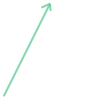

In [39]:
draw_arrow((10, 3), [-0.5, -1], 10)

## Draw Arrow Arrays

In [40]:
# a, b = [[10, 11], [-10, 15]]
# line = LineString([a, b])
# line

In [41]:
# line_vec = np.array([b[0] - a[0], b[1] - a[1]])
# line_vec = line_vec / np.linalg.norm(line_vec)

# n_arrows = 5
# arrow_vec = np.array([0, 1])
# arrow_vec = arrow_vec / np.linalg.norm(arrow_vec)

# delta = np.linalg.norm(np.array(b) - np.array(a))
# gaps = delta / (n_arrows - 1)

# inner_arrows = []
# for idx in range(1, n_arrows - 1):
#     ap = tuple(a + line_vec * (idx * gaps))
#     print(ap)
#     inner_arrows.append(draw_arrow(ap, arrow_vec, length=30))

# arrows = [draw_arrow(a, arrow_vec, length=30)] + inner_arrows + [draw_arrow(b, arrow_vec, length=30)]
# shafts = [extract_arrow_shaft(arrow) for arrow in arrows]
# GeometryCollection(arrows + [GeometryCollection(shafts).convex_hull])

In [42]:
def arrow_array_glyph(length: float, n_arrows: int, a_head: ArrayLike, b_head: ArrayLike, arrow_vec: ArrayLike) -> GeometryCollection:
    """
    Returns an arrow array glyph
    """
    return GeometryCollection(arrow_array(length, n_arrows, a_head, b_head, arrow_vec))

def arrow_array(length: float, n_arrows: int, a_head: ArrayLike, b_head: ArrayLike, arrow_vec: ArrayLike) -> GeometryCollection:
    """
    Returns an arrow array

    length: float, to make it a variable load could be a function that returns a different length based on a, b, and ap
    
    """
    a_head = np.array(a_head)
    b_head = np.array(b_head)
    line_vec = np.array(b_head) - np.array(a_head)
    delta = np.linalg.norm(line_vec)
    norm_vec = line_vec / delta
    gaps = delta / (n_arrows - 1)

    inner_arrows = []
    for idx in range(1, n_arrows - 1):
        ap = a_head + norm_vec * (idx * gaps)
        inner_arrows.append(draw_arrow(ap, arrow_vec, length=length))
    arrows = [draw_arrow(a_head, arrow_vec, length)] + inner_arrows + [draw_arrow(b_head, arrow_vec, length)]
    return arrows


def distributed_load_glyph(length: float, n_arrows: int, a_head: ArrayLike, b_head: ArrayLike, arrow_vec: ArrayLike) -> GeometryCollection:
    """
    Returns a distributed load glyph
    """
    arrows = arrow_array(length, n_arrows, a_head, b_head, arrow_vec)
    shafts = [extract_arrow_shaft(arrow) for arrow in arrows]
    return GeometryCollection(arrows + [GeometryCollection(shafts).convex_hull])

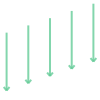

In [43]:
GeometryCollection(arrow_array(20, 5, (20, -10), (50, 0), arrow_vec=[0, 1]))

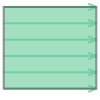

In [48]:
distributed_load_glyph(34, 6, (10, 0), (10, 30), [-1, 0])